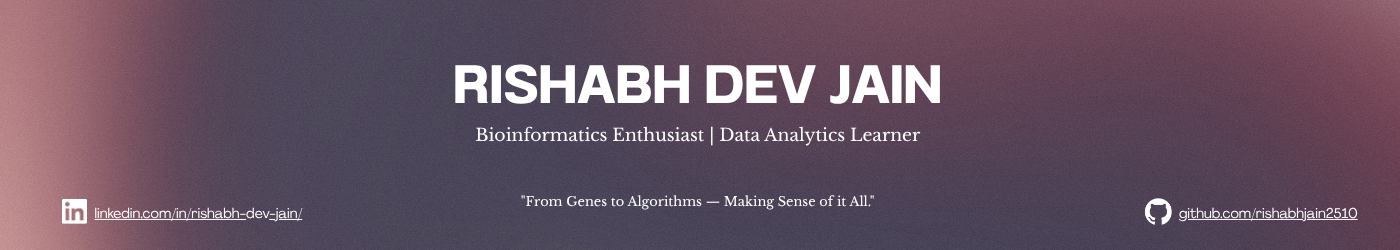

<div style="background-color:#494156; padding:15px; border-radius:8px;">
<h2 style="text-align:center; font-family: 'Helvetica Neue', sans-serif; font-weight:bold; font-size: 32px;">
TASK
</h2>
<h2 style="text-align:center; font-family: 'Helvetica Neue', sans-serif; font-weight:bold; font-size: 28px;">
SCRAPING FLIPKART WEBSITE AND DATA VISUALIZATIO
</h2>


</div>

In [1]:
import requests
from bs4 import BeautifulSoup

url = "https://www.flipkart.com/search?q=gaming%20laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"

headers = {'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36'}

response = requests.get(url)

if response.status_code == 200:
  soup = BeautifulSoup(response.content, "html.parser")
  print(soup.prettify())

else:
  print("Failed to load the page")


<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim2.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.066267.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x57.png" re

In [2]:
laptop = soup.find_all('div', class_="cPHDOP col-12-12")
laptop

[<div class="cPHDOP col-12-12"><div class="_0BvurA"><section class="pgRLLn _2OLUF3"><div class="_3Owiq+"><div class="rgHxCQ"><span>Filters</span></div></div></section><div class="GSeM5C"><section class="Iu4qXa"><div class="WCyB2K"><span>CATEGORIES</span></div><div><div class="esFpML"><span><svg class="IZmjtf" height="10" viewbox="0 0 16 27" width="10" xmlns="http://www.w3.org/2000/svg"><path class="P3pAQJ" d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff"></path></svg></span><a class="k17cBJ WyLc0s" href="/gaming/pr?sid=4rr&amp;q=gaming+laptops&amp;otracker=categorytree" title="Gaming">Gaming</a></div></div><div><div class="esFpML"><span><svg class="IZmjtf" height="10" viewbox="0 0 16 27" width="10" xmlns="http://www.w3.org/2000/svg"><path class="" d="M16 23.207L6.11 13.161 16 3.093 12.955 0 0 13.161l12.955 13.161z" fill="#fff"></path></svg></span><a class="hEjLuS WyLc0s" href="/gaming/gaming-laptops/pr?sid=4rr,tz1&amp;q=gaming+laptops&amp;otracker=catego

In [3]:
print(len(laptop))

29


In [4]:
laptop_data=[]

In [5]:
for l in laptop:
    
    product_element = l.find('div', class_="KzDlHZ")
    product = product_element.get_text(strip=True) if product_element else "N/A"

    features_element = l.find('ul', class_="G4BRas")
    features = features_element.get_text(strip=True) if features_element else "N/A"

    disprice_element = l.find('div', class_="Nx9bqj _4b5DiR")
    disprice = disprice_element.get_text(strip=True) if disprice_element else "N/A"

    price_element = l.find('div', class_="yRaY8j ZYYwLA")
    price = price_element.get_text(strip=True) if price_element else "N/A"

    rating_element = l.find('div', class_="XQDdHH")
    rating = rating_element.get_text(strip=True) if rating_element else "N/A"

    if product != "N/A":
        laptop_data.append({
            "Product Name": product,
            "Features": features,
            "MRP": price,
            "Discounted Price": disprice,
            "Ratings": rating
    })

In [6]:
print(laptop_data)

[{'Product Name': 'Acer Nitro V AMD Ryzen 5 Hexa Core 6600H - (16 GB/512 GB SSD/Windows 11 Home/6 GB Graphics/NVIDIA GeFo...', 'Features': 'AMD Ryzen 5 Hexa Core Processor16 GB DDR5 RAM64 bit Windows 11 Operating System512 GB SSD40.64 cm (16 inch) Display1 Year International Travelers Warranty (ITW)', 'MRP': '₹1,08,999', 'Discounted Price': '₹57,990', 'Ratings': '4.4'}, {'Product Name': 'DELL G15 Intel Core i5 13th Gen 13450HX - (16 GB/1 TB SSD/Windows 11 Home/6 GB Graphics/NVIDIA GeForce...', 'Features': 'Intel Core i5 Processor (13th Gen)16 GB DDR5 RAMWindows 11 Operating System1 TB SSD39.62 cm (15.6 inch) DisplayAlienware Command Center,Dell Support Assist)1 Year Onsite Warranty', 'MRP': '₹1,01,709', 'Discounted Price': '₹74,990', 'Ratings': '4'}, {'Product Name': 'ASUS Vivobook 16X (2025) with Office 2024 + M365 Basic* Intel Core i5 13th Gen 13420H - (16 GB/512 GB ...', 'Features': 'Intel Core i5 Processor (13th Gen)16 GB DDR4 RAMWindows 11 Home Operating System512 GB SSD40.64 cm (

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(laptop_data)
df

,Product Name,Features,MRP,Discounted Price,Ratings
0,Acer Nitro V AMD Ryzen 5 Hexa Core 6600H - (16...,AMD Ryzen 5 Hexa Core Processor16 GB DDR5 RAM6...,"₹1,08,999","₹57,990",4.4
1,DELL G15 Intel Core i5 13th Gen 13450HX - (16 ...,Intel Core i5 Processor (13th Gen)16 GB DDR5 R...,"₹1,01,709","₹74,990",4
2,ASUS Vivobook 16X (2025) with Office 2024 + M3...,Intel Core i5 Processor (13th Gen)16 GB DDR4 R...,"₹89,990","₹63,799",4.2
3,ASUS TUF Gaming A15 AMD Ryzen 7 Octa Core 7435...,AMD Ryzen 7 Octa Core Processor16 GB DDR5 RAMW...,"₹75,990","₹56,990",4.3
4,MSI Thin 15 Intel Core i5 12th Gen 12450H - (1...,Intel Core i5 Processor (12th Gen)16 GB DDR4 R...,"₹70,990","₹55,990",4.3
5,HP Omen AMD Ryzen 7 Octa Core 7840HS - (16 GB/...,AMD Ryzen 7 Octa Core Processor16 GB DDR5 RAMW...,"₹1,23,652","₹92,900",4.5
6,Lenovo LOQ Intel Core i5 13th Gen 13450HX - (1...,Intel Core i5 Processor (13th Gen)16 GB DDR5 R...,"₹1,12,990","₹78,990",4.3
7,HP Victus Intel Core i5 13th Gen 13420H - (16 ...,Intel Core i5 Processor (13th Gen)16 GB DDR4 R...,"₹75,142","₹60,990",4.3
8,Lenovo LOQ Essential Intel Core i5 12th Gen 12...,Intel Core i5 Processor (12th Gen)12 GB DDR5 R...,"₹77,390","₹51,990",4.5
9,Infinix GT Book Intel Core i5 12th Gen 12450H ...,Intel Core i5 Processor (12th Gen)16 GB LPDDR5...,"₹99,990","₹53,990",4.3


In [122]:
import pandas as pd

df['Ratings'] = pd.to_numeric(df['Ratings'], errors='coerce')

mean_rating = df['Ratings'].mean()
df['Ratings'] = df['Ratings'].fillna(mean_rating)

df.dropna(how='all', inplace=True)

df


,Product Name,Features,MRP,Discounted Price,Ratings
0,HP Victus AMD Ryzen 7 Hexa Core 7445H - (16 GB...,AMD Ryzen 7 Hexa Core Processor16 GB DDR5 RAMW...,"₹76,354","₹61,990",4.3
1,HP Victus Intel Core i5 13th Gen 13420H - (16 ...,Intel Core i5 Processor (13th Gen)16 GB DDR4 R...,"₹94,534","₹72,990",4.1
2,Acer Aspire 7 Intel Core i5 13th Gen 13420H - ...,Intel Core i5 Processor (13th Gen)16 GB DDR4 R...,"₹89,999","₹57,990",4.3
3,DELL G15 Intel Core i5 13th Gen 13450HX - (16 ...,Intel Core i5 Processor (13th Gen)16 GB DDR5 R...,"₹1,06,331","₹74,990",4.0
4,Acer Nitro V AMD Ryzen 5 Hexa Core 6600H - (16...,AMD Ryzen 5 Hexa Core Processor16 GB DDR5 RAM6...,"₹1,08,999","₹57,990",4.5
5,HP Victus AMD Ryzen 7 Octa Core 260 - (24 GB/1...,AMD Ryzen 7 Octa Core Processor24 GB DDR5 RAMW...,"₹1,20,928","₹99,990",4.3
6,ASUS TUF Gaming A15 AMD Ryzen 7 Octa Core 7435...,AMD Ryzen 7 Octa Core Processor16 GB DDR5 RAMW...,"₹86,990","₹63,990",4.3
7,MSI Thin 15 Intel Core i5 12th Gen 12450H - (1...,Intel Core i5 Processor (12th Gen)16 GB DDR4 R...,"₹70,990","₹55,990",4.3
8,ASUS TUF Gaming A15 AMD Ryzen 7 Octa Core 7435...,AMD Ryzen 7 Octa Core Processor16 GB DDR5 RAMW...,"₹75,990","₹56,990",4.3
9,HP Victus AI 31 TOPS AMD Ryzen 5 Hexa Core 864...,AMD Ryzen 5 Hexa Core Processor16 GB DDR5 RAMW...,"₹73,930","₹58,990",4.3


In [10]:
df.to_csv("GamingLaptopList.csv", index=False)
print("File Saved")

File Saved


In [123]:
import matplotlib.pyplot as plt

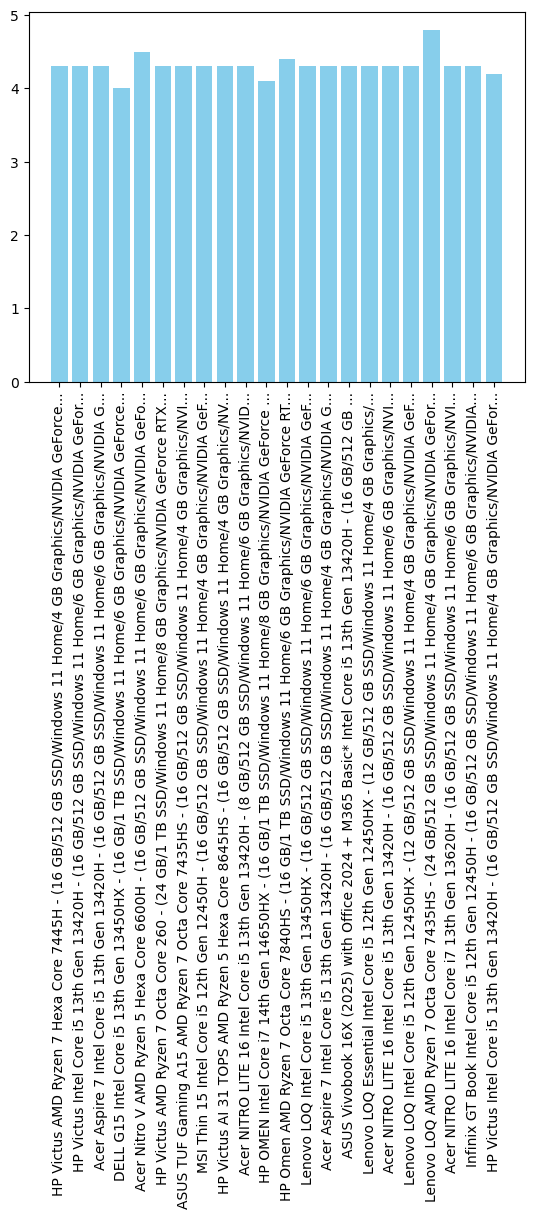

In [124]:
plt.bar(df['Product Name'], df['Ratings'], color='skyblue')
plt.xticks(rotation=90)
plt.show()

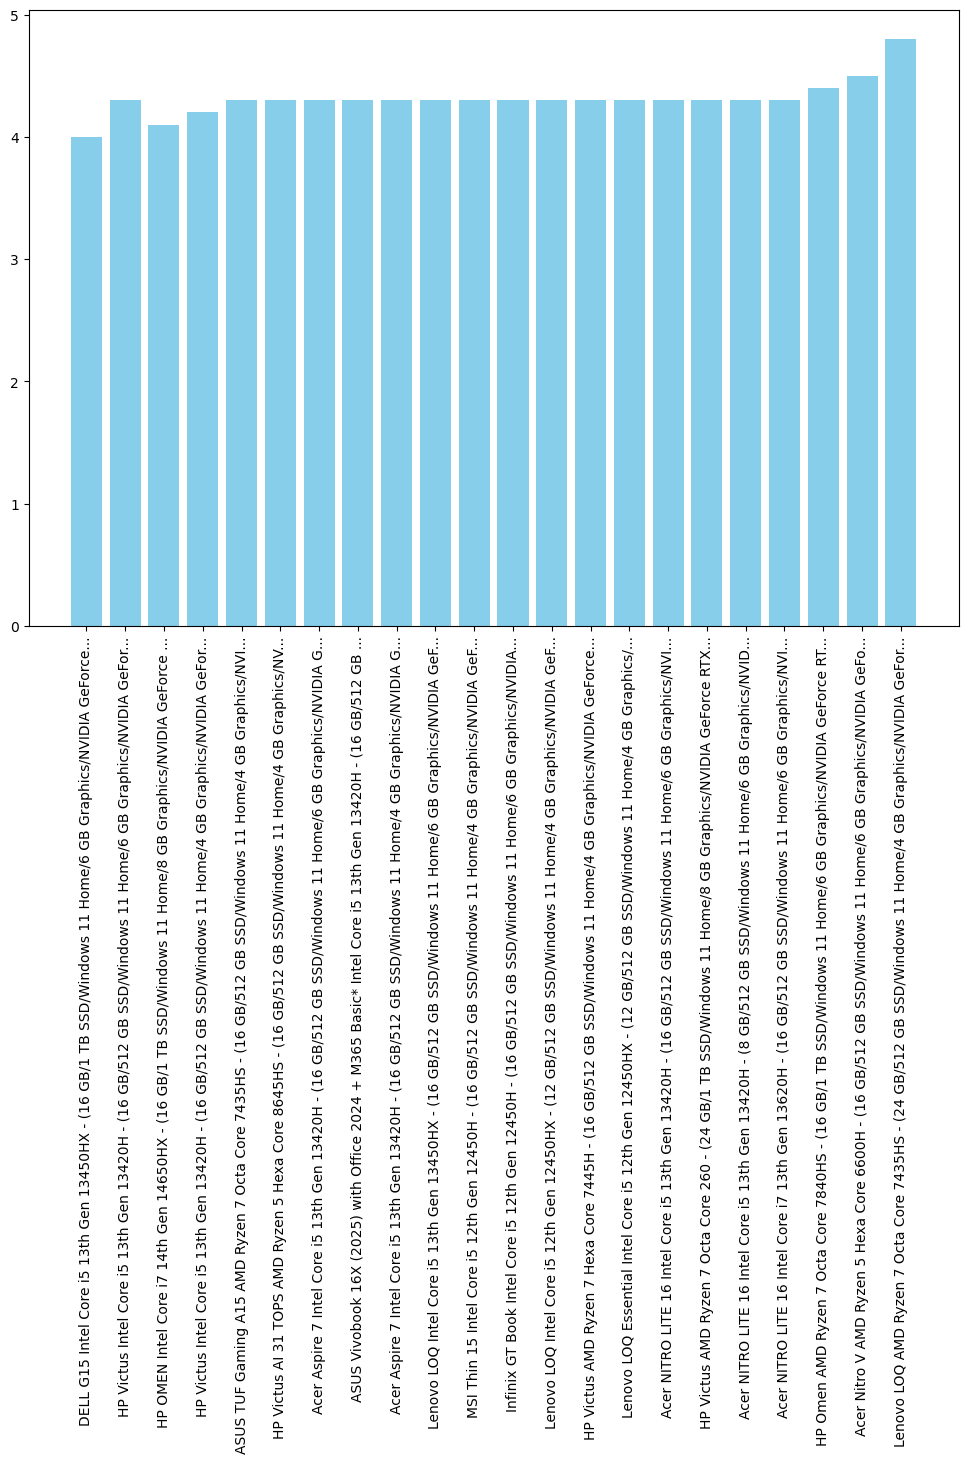

In [125]:
df1 = df.sort_values(by='Ratings', ascending=True) 
plt.figure(figsize=(12,8))
plt.bar(df1['Product Name'], df1['Ratings'], color='skyblue')
plt.xticks(rotation=90)
plt.show()

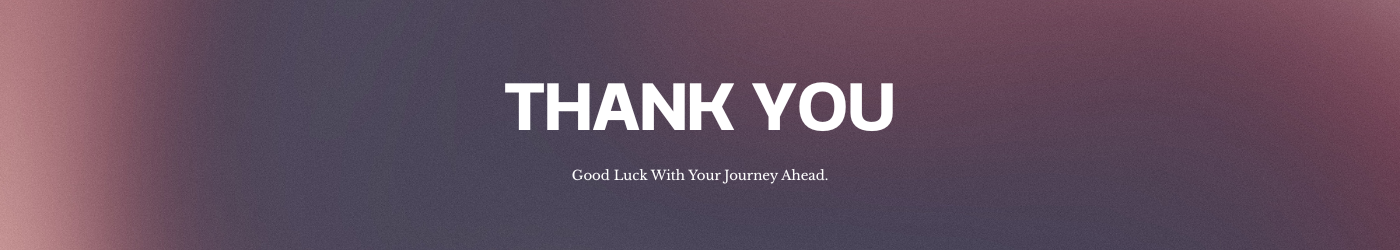